In [1]:
from keras.layers import Dense,Input
from keras.models import Model
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

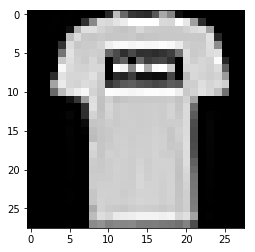

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.gray()
plt.show()

In [7]:
X_train=x_train.reshape((x_train.shape[0],np.prod(x_train.shape[1:])))

In [8]:
X_test=x_test.reshape((x_test.shape[0],np.prod(x_test.shape[1:])))

In [9]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [22]:
input_dim=784
encode1=512
encode2=256
encode3=128
coding_size=64

In [23]:
inp=Input((input_dim,))
encoded=Dense(encode1)(inp)
encoded=Dense(encode2)(encoded)
encoded=Dense(encode3)(encoded)


encoded=Dense(coding_size)(encoded)

decoded=Dense(encode3)(encoded)
decoded=Dense(encode2)(decoded)
decoded=Dense(encode1)(decoded)
decoded=Dense(input_dim)(decoded)
autoencoder=Model(inputs=inp,outputs=decoded)

In [24]:
autoencoder.compile(loss="mean_squared_error",optimizer="adamax")

In [25]:
autoencoder.fit(X_train,X_train,shuffle=True,epochs=50,batch_size=256,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.0733 - val_loss: 0.0350
Epoch 2/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.0302 - val_loss: 0.0271
Epoch 3/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0254 - val_loss: 0.0239
Epoch 4/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.0227 - val_loss: 0.0216
Epoch 5/50
48000/48000 [==============================] - 19s 386us/step - loss: 0.0207 - val_loss: 0.0199
Epoch 6/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.0191 - val_loss: 0.0184
Epoch 7/50
48000/48000 [==============================] - 18s 380us/step - loss: 0.0178 - val_loss: 0.0172
Epoch 8/50
48000/48000 [==============================] - 19s 385us/step - loss: 0.0166 - val_loss: 0.0161
Epoch 9/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.0157 - val_

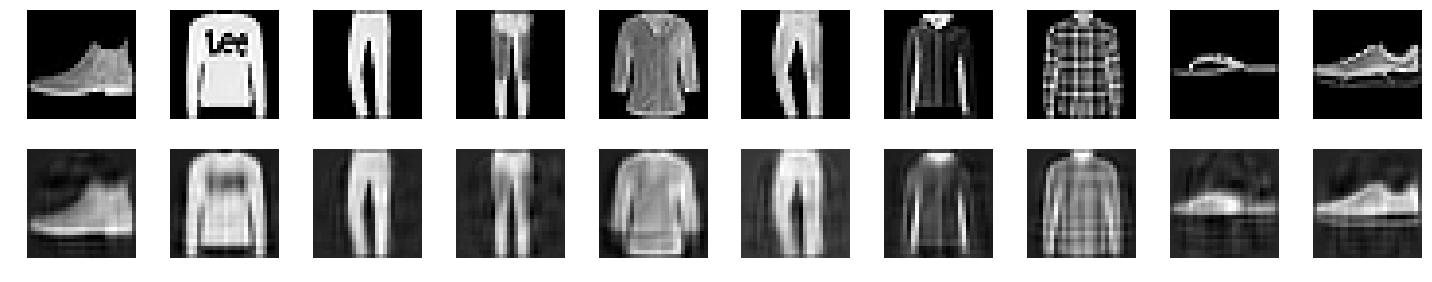

In [26]:
reconstructed_img=autoencoder.predict(X_test)
plt.figure(figsize=(20,4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.axis('off')

    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(reconstructed_img[i].reshape(28, 28))
    plt.axis('off')

plt.tight_layout()
plt.show()
